In [9]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn import linear_model
import numpy as np

In [2]:
dfs = [
    pd.read_csv('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/61705027 Test Data.txt', sep='\t', header=0),
    pd.read_csv('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/61705028 Test Data.txt', sep='\t', header=0),
    pd.read_csv('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/61706053 Test Data.txt', sep='\t', header=0),
    pd.read_csv('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/61706054 Test Data.txt', sep='\t', header=0),
    pd.read_csv('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/61706055 Test Data.txt', sep='\t', header=0)
]

df = pd.concat(dfs, sort=False)

In [3]:
list(df.columns)

['Time[s]_RawFacilities',
 'Dyno_Spd[mph]',
 'Dyno_TractiveForce[N]',
 'Dyno_LoadCell[N]',
 'Distance[mi]',
 'Dyno_Spd_Front[mph]',
 'Dyno_TractiveForce_Front[N]',
 'Dyno_LoadCell_Front[N]',
 'Dyno_Spd_Rear[mph]',
 'Dyno_LoadCell_Rear[N]',
 'Dyno_TractiveForce_Rear[N]',
 'DilAir_RH[%]',
 'Tailpipe_Press[inH2O]',
 'Cell_Temp[C]',
 'Cell_RH[%]',
 'Cell_Press[inHg]',
 'Tire_Front_Temp[C]',
 'Tire_Rear_Temp[C]',
 'Drive_Trace_Schedule[mph]',
 'Exhaust_Bag',
 'Engine_Oil_Dipstick_Temp[C]',
 'Radiator_Air_Outlet_Temp[C]',
 'Engine_Bay_Temp[C]',
 'Cabin_Temp[C]',
 'Cabin_Upper_Vent_Temp[C]',
 'Cabin_Lower_Vent_Temp[C]',
 'Solar_Array_Ind_Temp[C]',
 'Eng_FuelFlow_Direct2[gps]',
 '12VBatt_Volt_Hioki_U1[V]',
 '12VBatt_Curr_Hioki_I1[A]',
 '12VBatt_Power_Hioki_P1[W]',
 'Alternator_Curr_Hioki_I2[A]',
 'Alternator_Power_Hioki_P2[W]',
 '12VBatt_Curr_Hi_Hioki_I3[A]',
 '12VBatt_Power_Hi_Hioki_P3[W]',
 'Eng_FuelFlow_Direct[ccps]',
 'Eng_Fuel_Temp_Direct[C]',
 'Time[s]',
 'Trans_shift_inprogress_CAN[]',


<IPython.core.display.Javascript object>


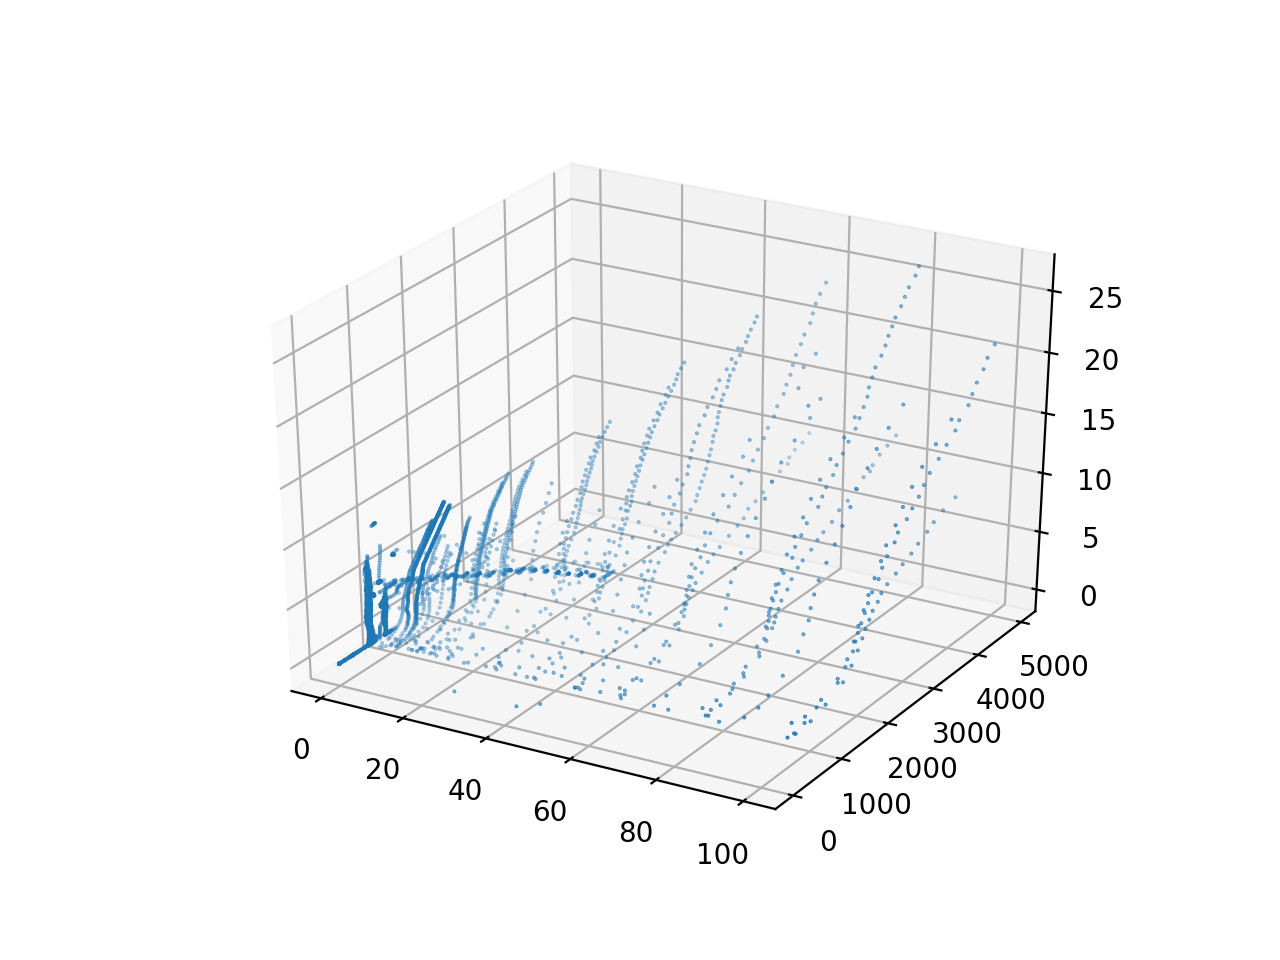

<IPython.core.display.Javascript object>


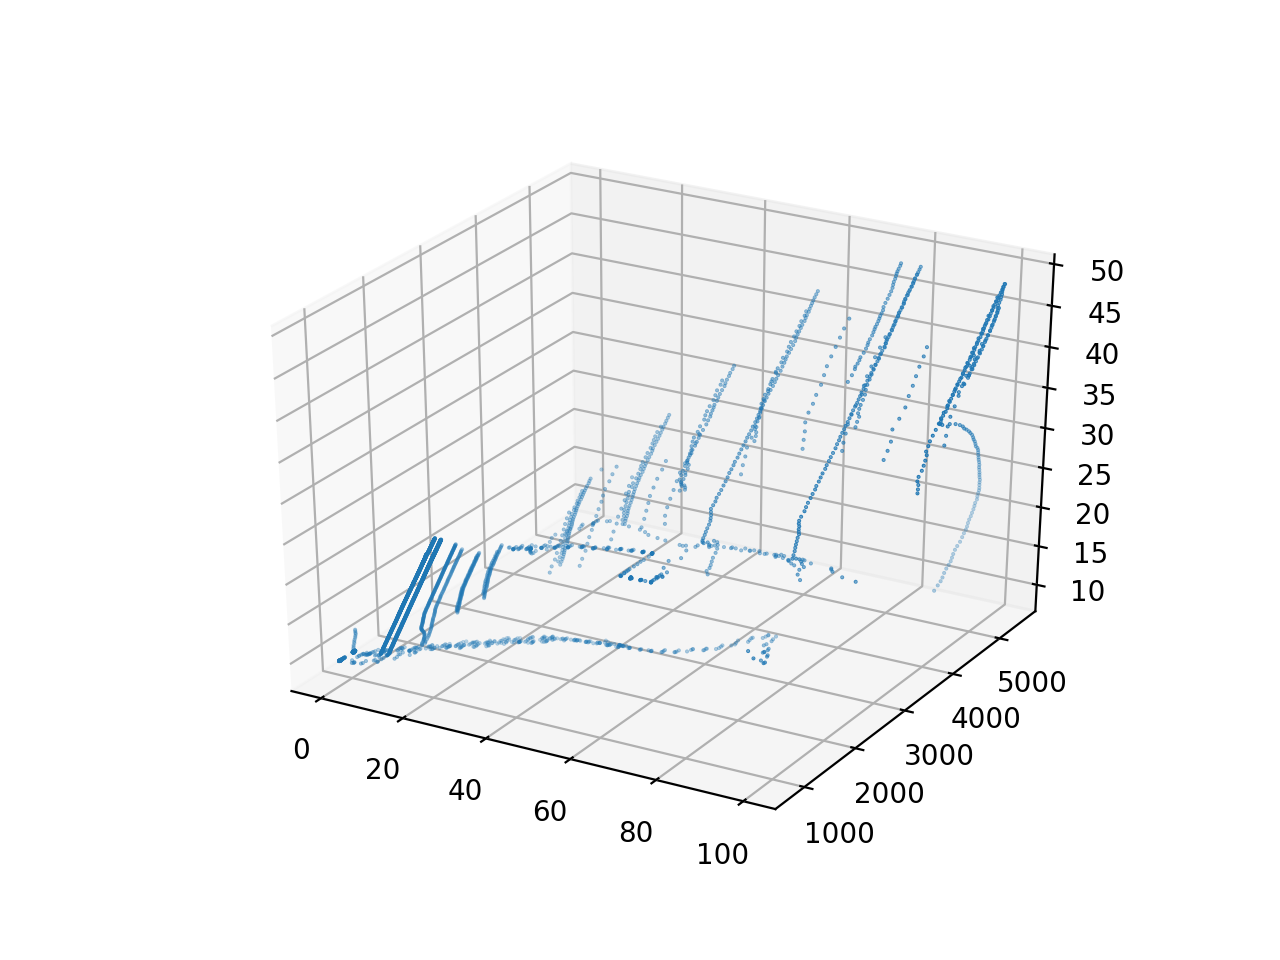

<IPython.core.display.Javascript object>


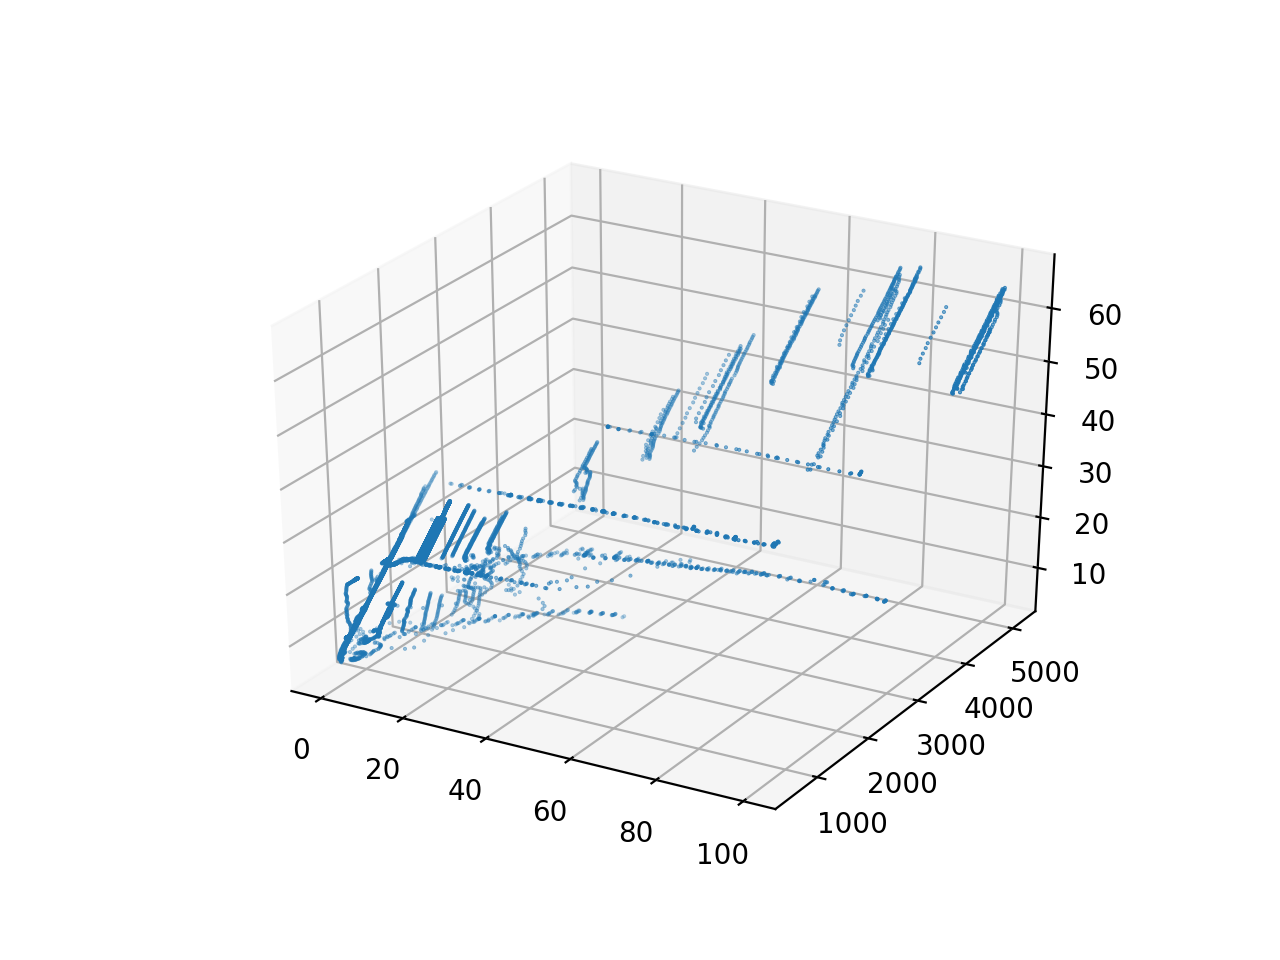

<IPython.core.display.Javascript object>


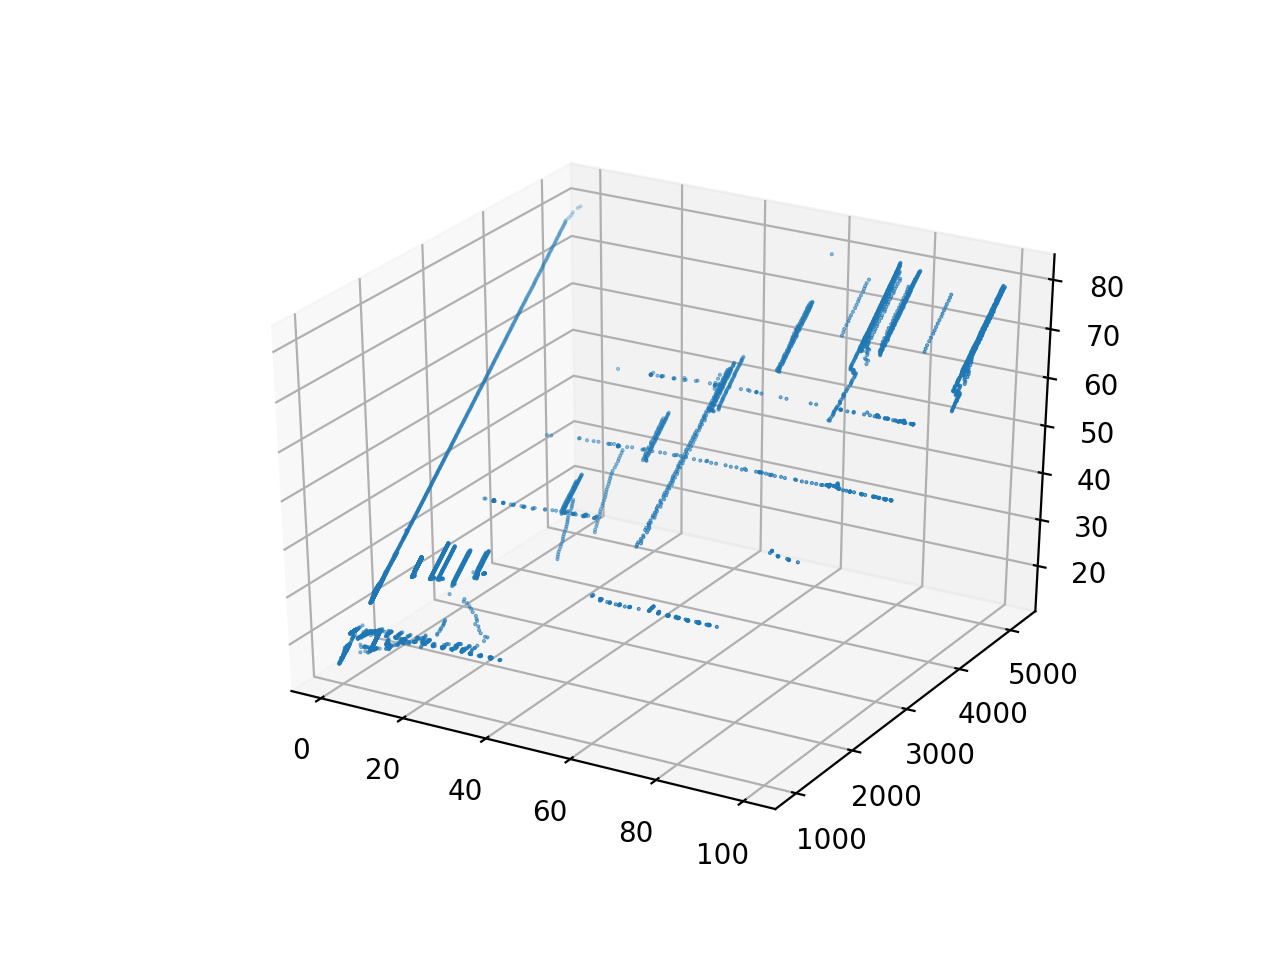

<IPython.core.display.Javascript object>


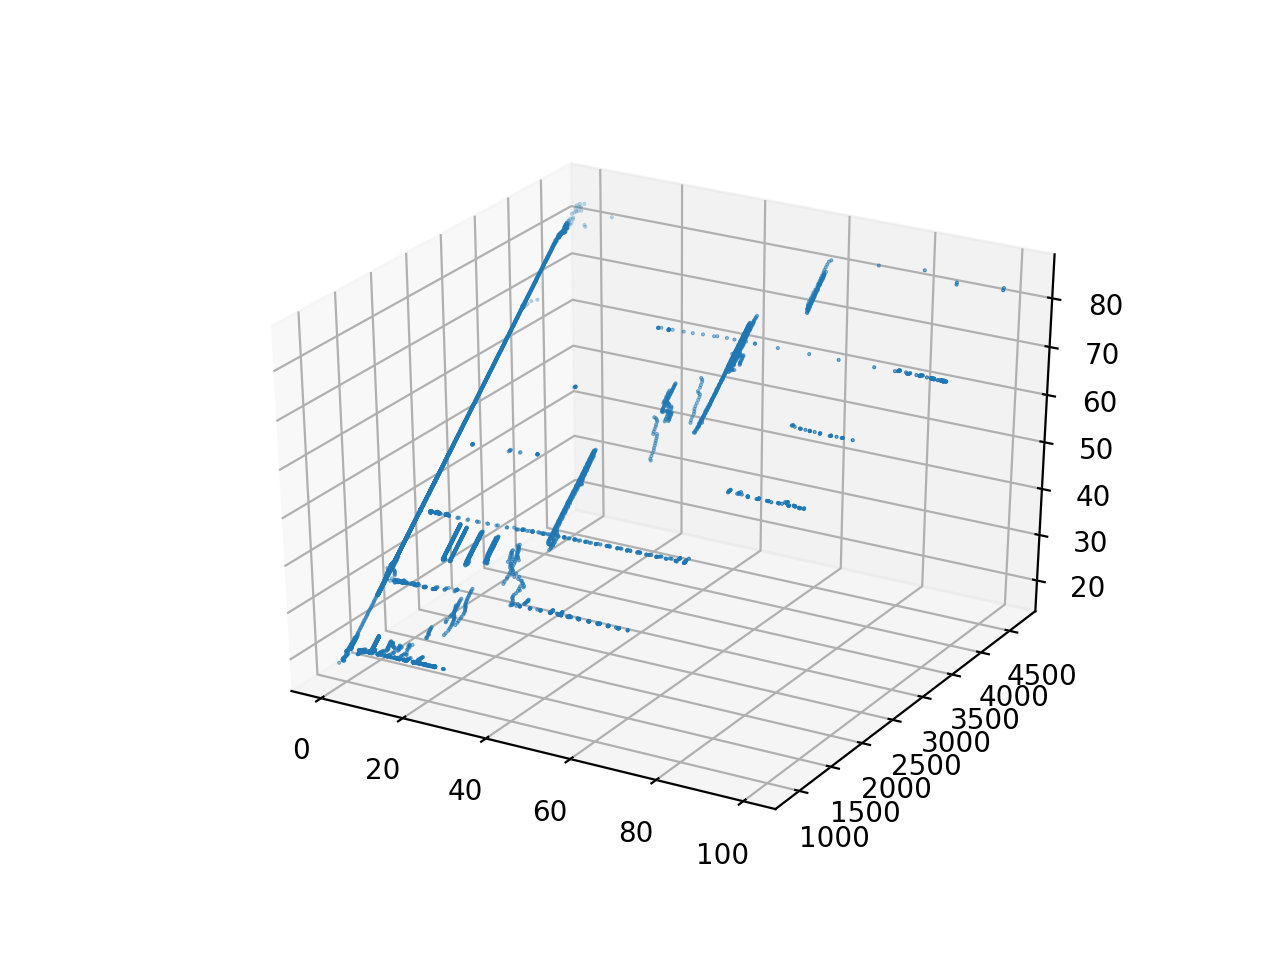

<IPython.core.display.Javascript object>


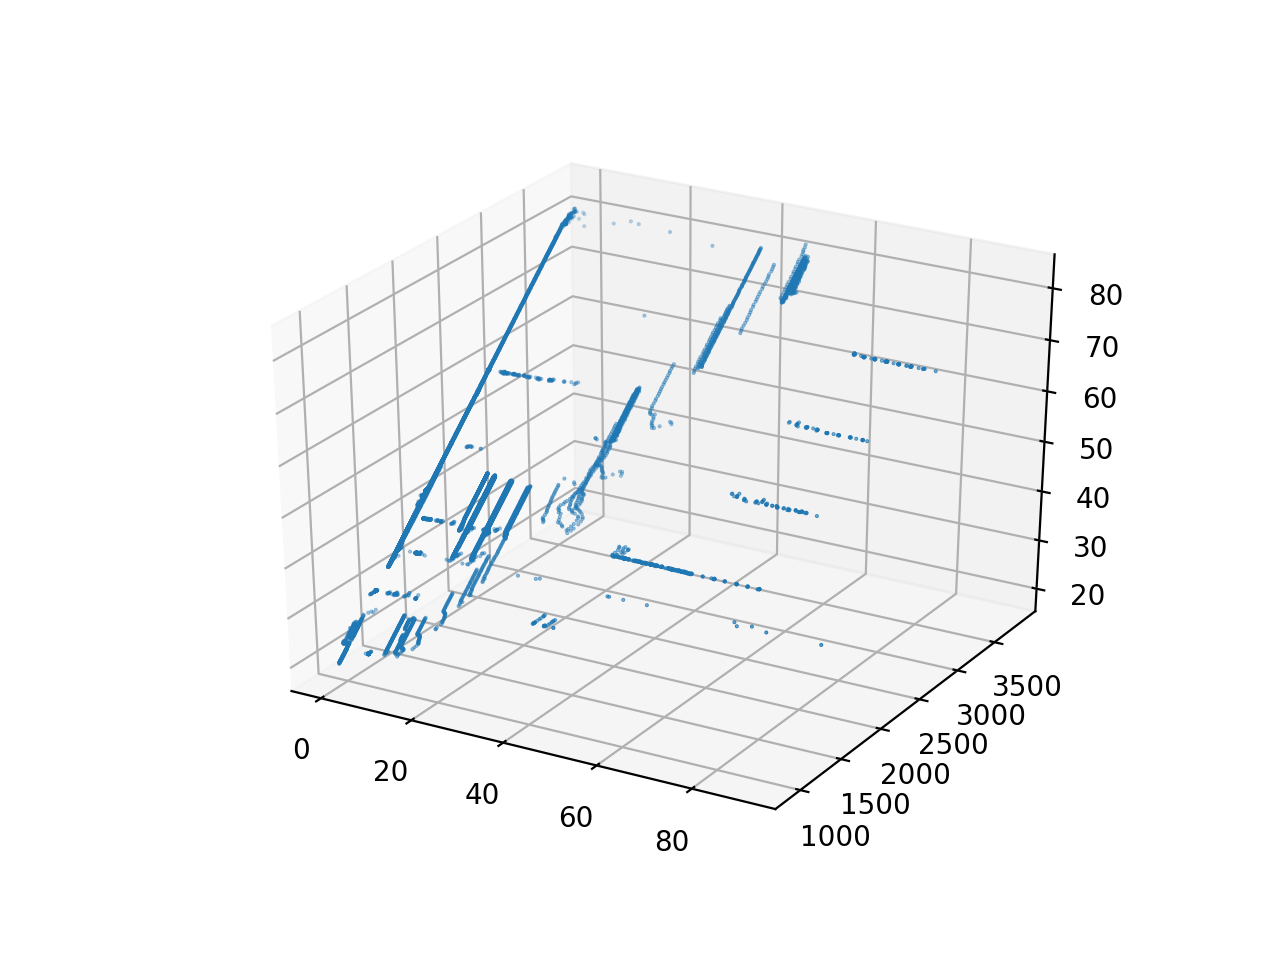

<IPython.core.display.Javascript object>


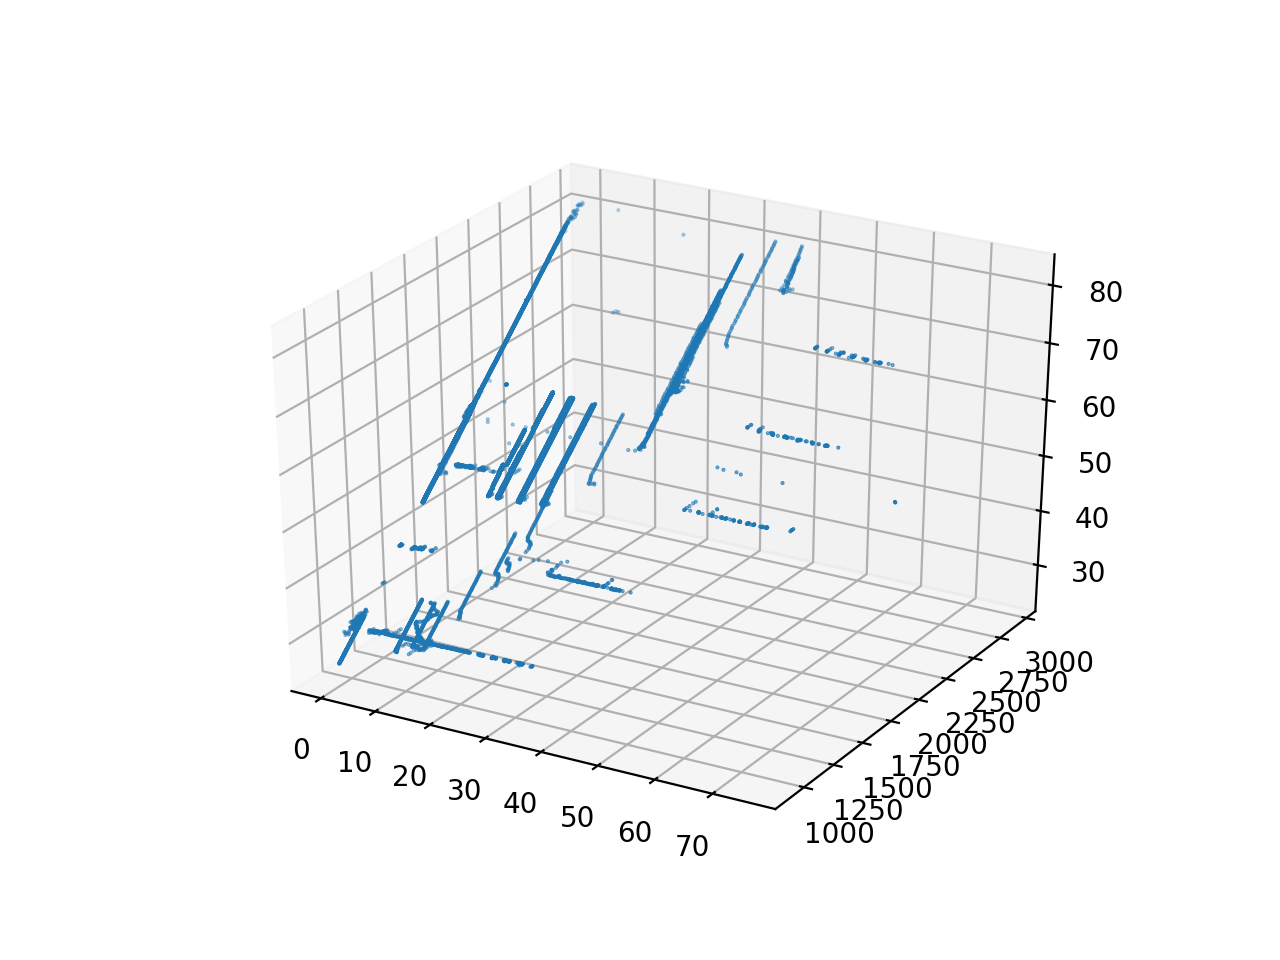

<IPython.core.display.Javascript object>


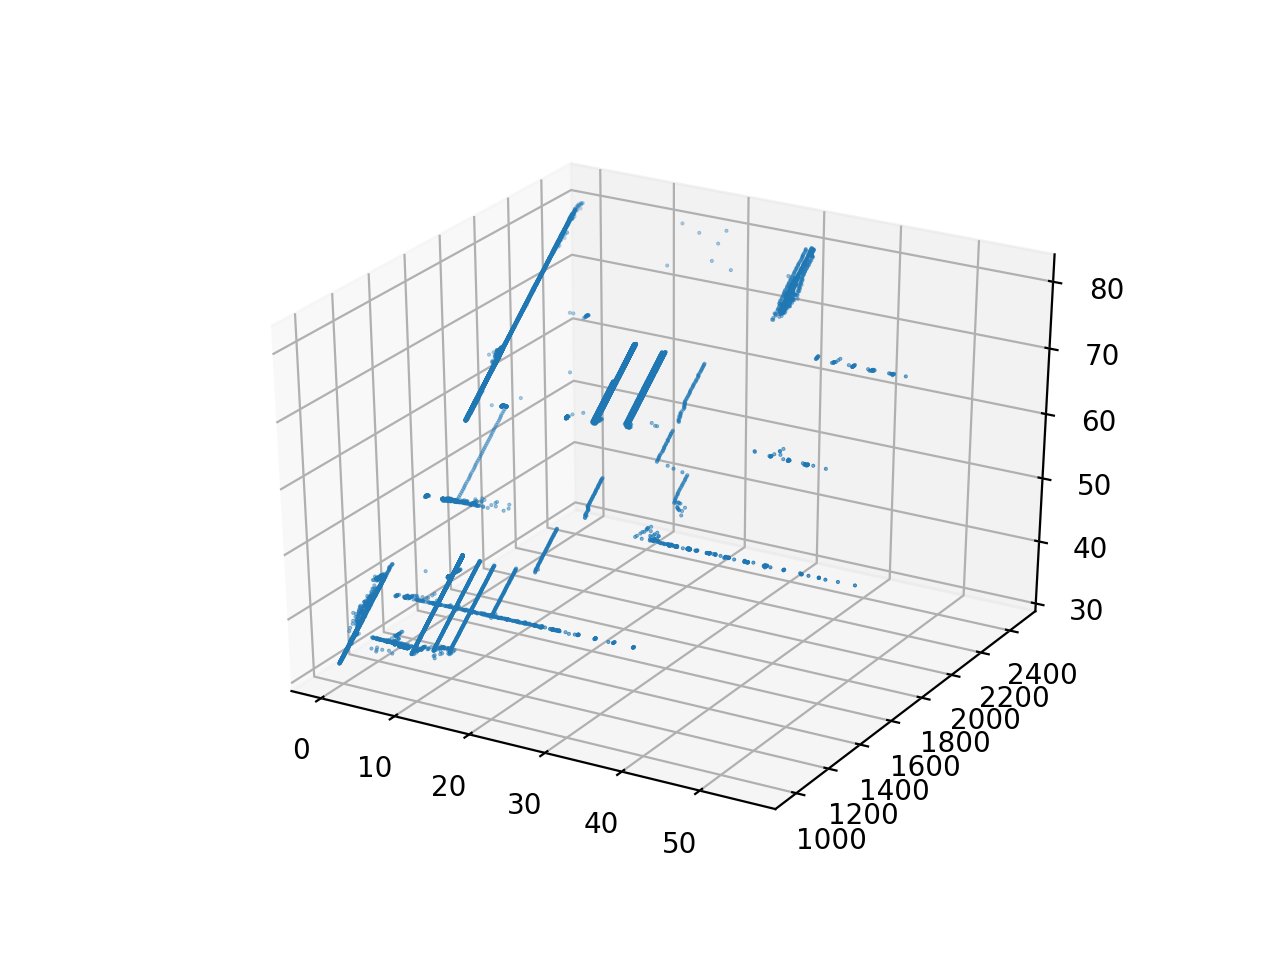

<IPython.core.display.Javascript object>


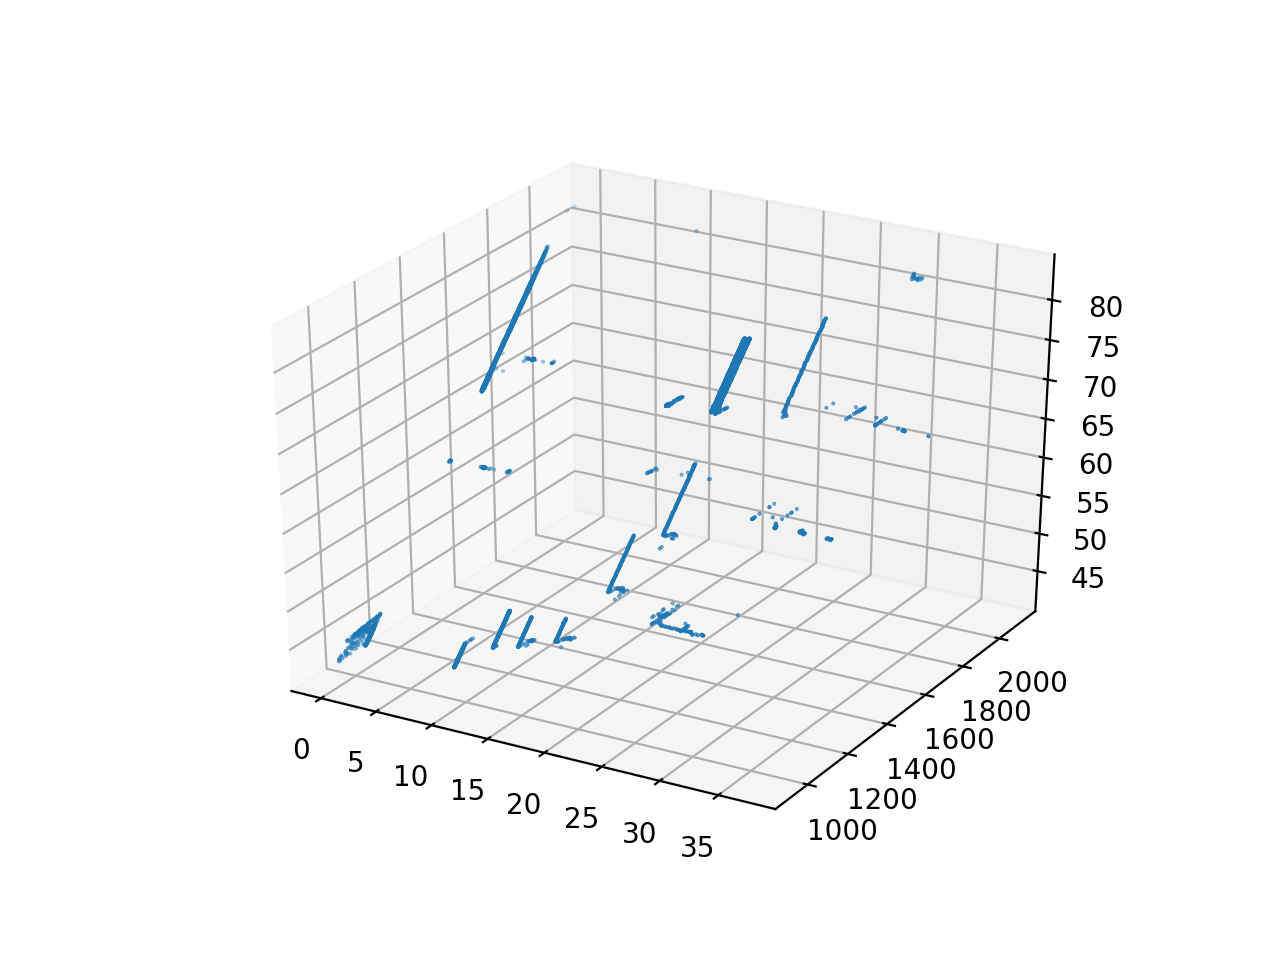

<IPython.core.display.Javascript object>


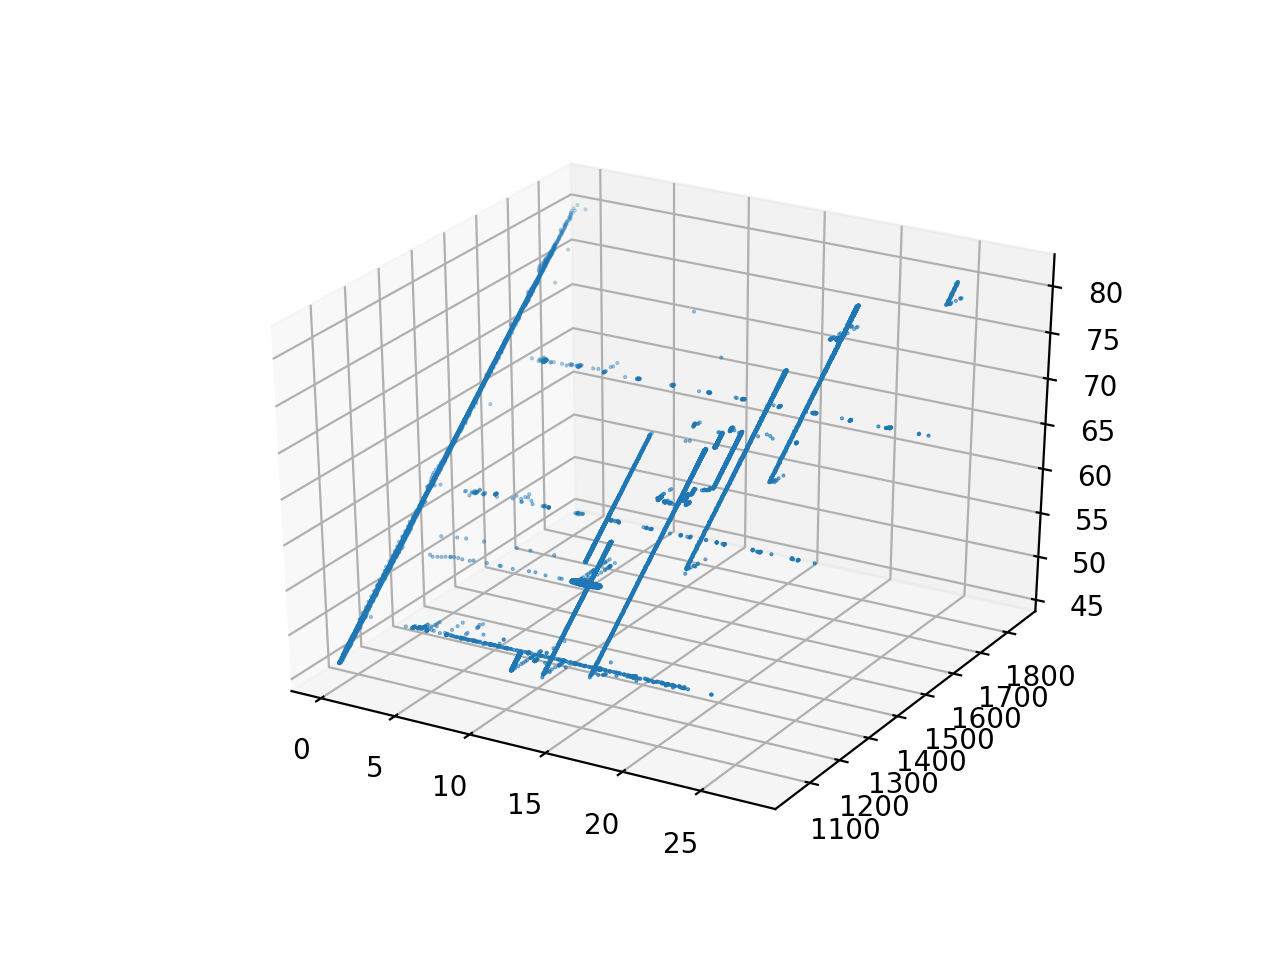

In [4]:
for i in range(1, 11):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    X = df[(df['Trans_gear_engaged_CAN[]'] == i) & (df['Trans_shift_inprogress_CAN[]'] == 0)]['Pedal_accel_pos_CAN[per]']
    Y = df[(df['Trans_gear_engaged_CAN[]'] == i) & (df['Trans_shift_inprogress_CAN[]'] == 0)]['Eng_speed_PCM[rpm]']
    Z = df[(df['Trans_gear_engaged_CAN[]'] == i) & (df['Trans_shift_inprogress_CAN[]'] == 0)]['Dyno_Spd[mph]']

    ax.scatter(X, Y, Z, s=0.2)

In [26]:
df_gear_one = df[(df['Trans_gear_engaged_CAN[]'] == 1.0) & (df['Trans_shift_inprogress_CAN[]'] == 0.0)]

X_train = df[['Pedal_accel_pos_CAN[per]', 'Eng_speed_PCM[rpm]']].values.reshape(-1, 2)
Y_train = df['Dyno_Spd[mph]'].values

ols = linear_model.LinearRegression()
model = ols.fit(X_train, Y_train)

In [31]:
x1 = np.arange(0, 100, 0.1)
x2 = np.arange(0, 5000, 0.1)

xx1, xx2 = np.meshgrid(x1, x2)

In [32]:
xx1_flat = xx1.reshape(xx1.shape[0] * xx1.shape[1], 1)
xx2_flat = xx2.reshape(xx2.shape[0] * xx2.shape[1], 1)

In [38]:
X_plane = np.concatenate([xx1_flat, xx2_flat], axis=1)

<IPython.core.display.Javascript object>


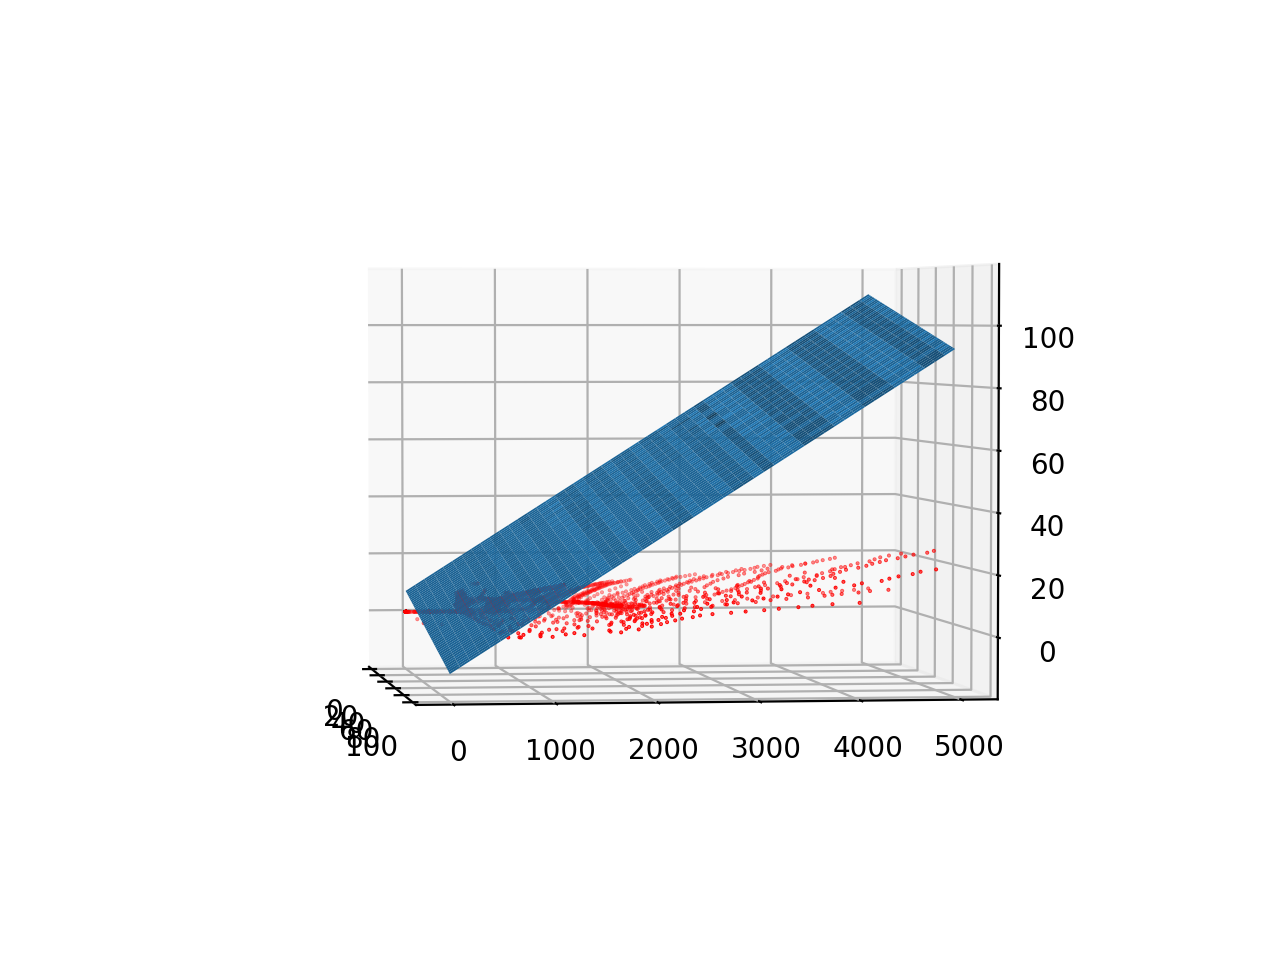

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx1, xx2, model.predict(X_plane).reshape(50000, 1000))

X = df_gear_one['Pedal_accel_pos_CAN[per]']
Y = df_gear_one['Eng_speed_PCM[rpm]']
Z = df_gear_one['Dyno_Spd[mph]']

ax.scatter(X, Y, Z, s=0.2, color='red')

In [42]:
xx1.shape

(50000, 1000)